In [63]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Sites
- Long Beach-Signal Hill 
- West Los Angeles-VA Hospital
- Pico Rivera-4144 San Gabriel
- Pasadena-S Wilson Avenue
- Los Angeles-North Main Street

In [101]:
start_date = '2020-01-01'
end_date = '2020-12-31'
sites = ['DTLA', 'Long_Beach', 'Pasadena', 'Pico_Rivera', 'West_LA']

data_path = '../AQMD data/Location Data'
files = [x for x in os.listdir(data_path) if not x.startswith('.')]

datelist = pd.date_range(start_date, end_date).tolist()
datelist = [date.to_pydatetime().strftime('%Y-%m-%d') for date in datelist]

data = {}

In [104]:
for f in files:
    variable = f.split('_')[-1][:-4].lower()
    site = f[:-len(variable)-5]
    
    df = pd.read_csv(f'{data_path}/{f}')
    
    df = df[['summary_date', f'{variable}_dmax1hr']]
    df = df.rename(columns={f'{variable}_dmax1hr': variable})
    df = df.dropna()

    df.index = pd.DatetimeIndex(df['summary_date'])
    df = df.drop('summary_date', axis=1)
    df = df.reindex(pd.date_range(start_date, end_date), fill_value=np.nan)
    df[variable] = df[variable].interpolate(method="cubic")
    
    data[site] = {}
    data[site][variable] = df

In [118]:
dfs = [(site, df['ozone']) for site, df in data.items()]

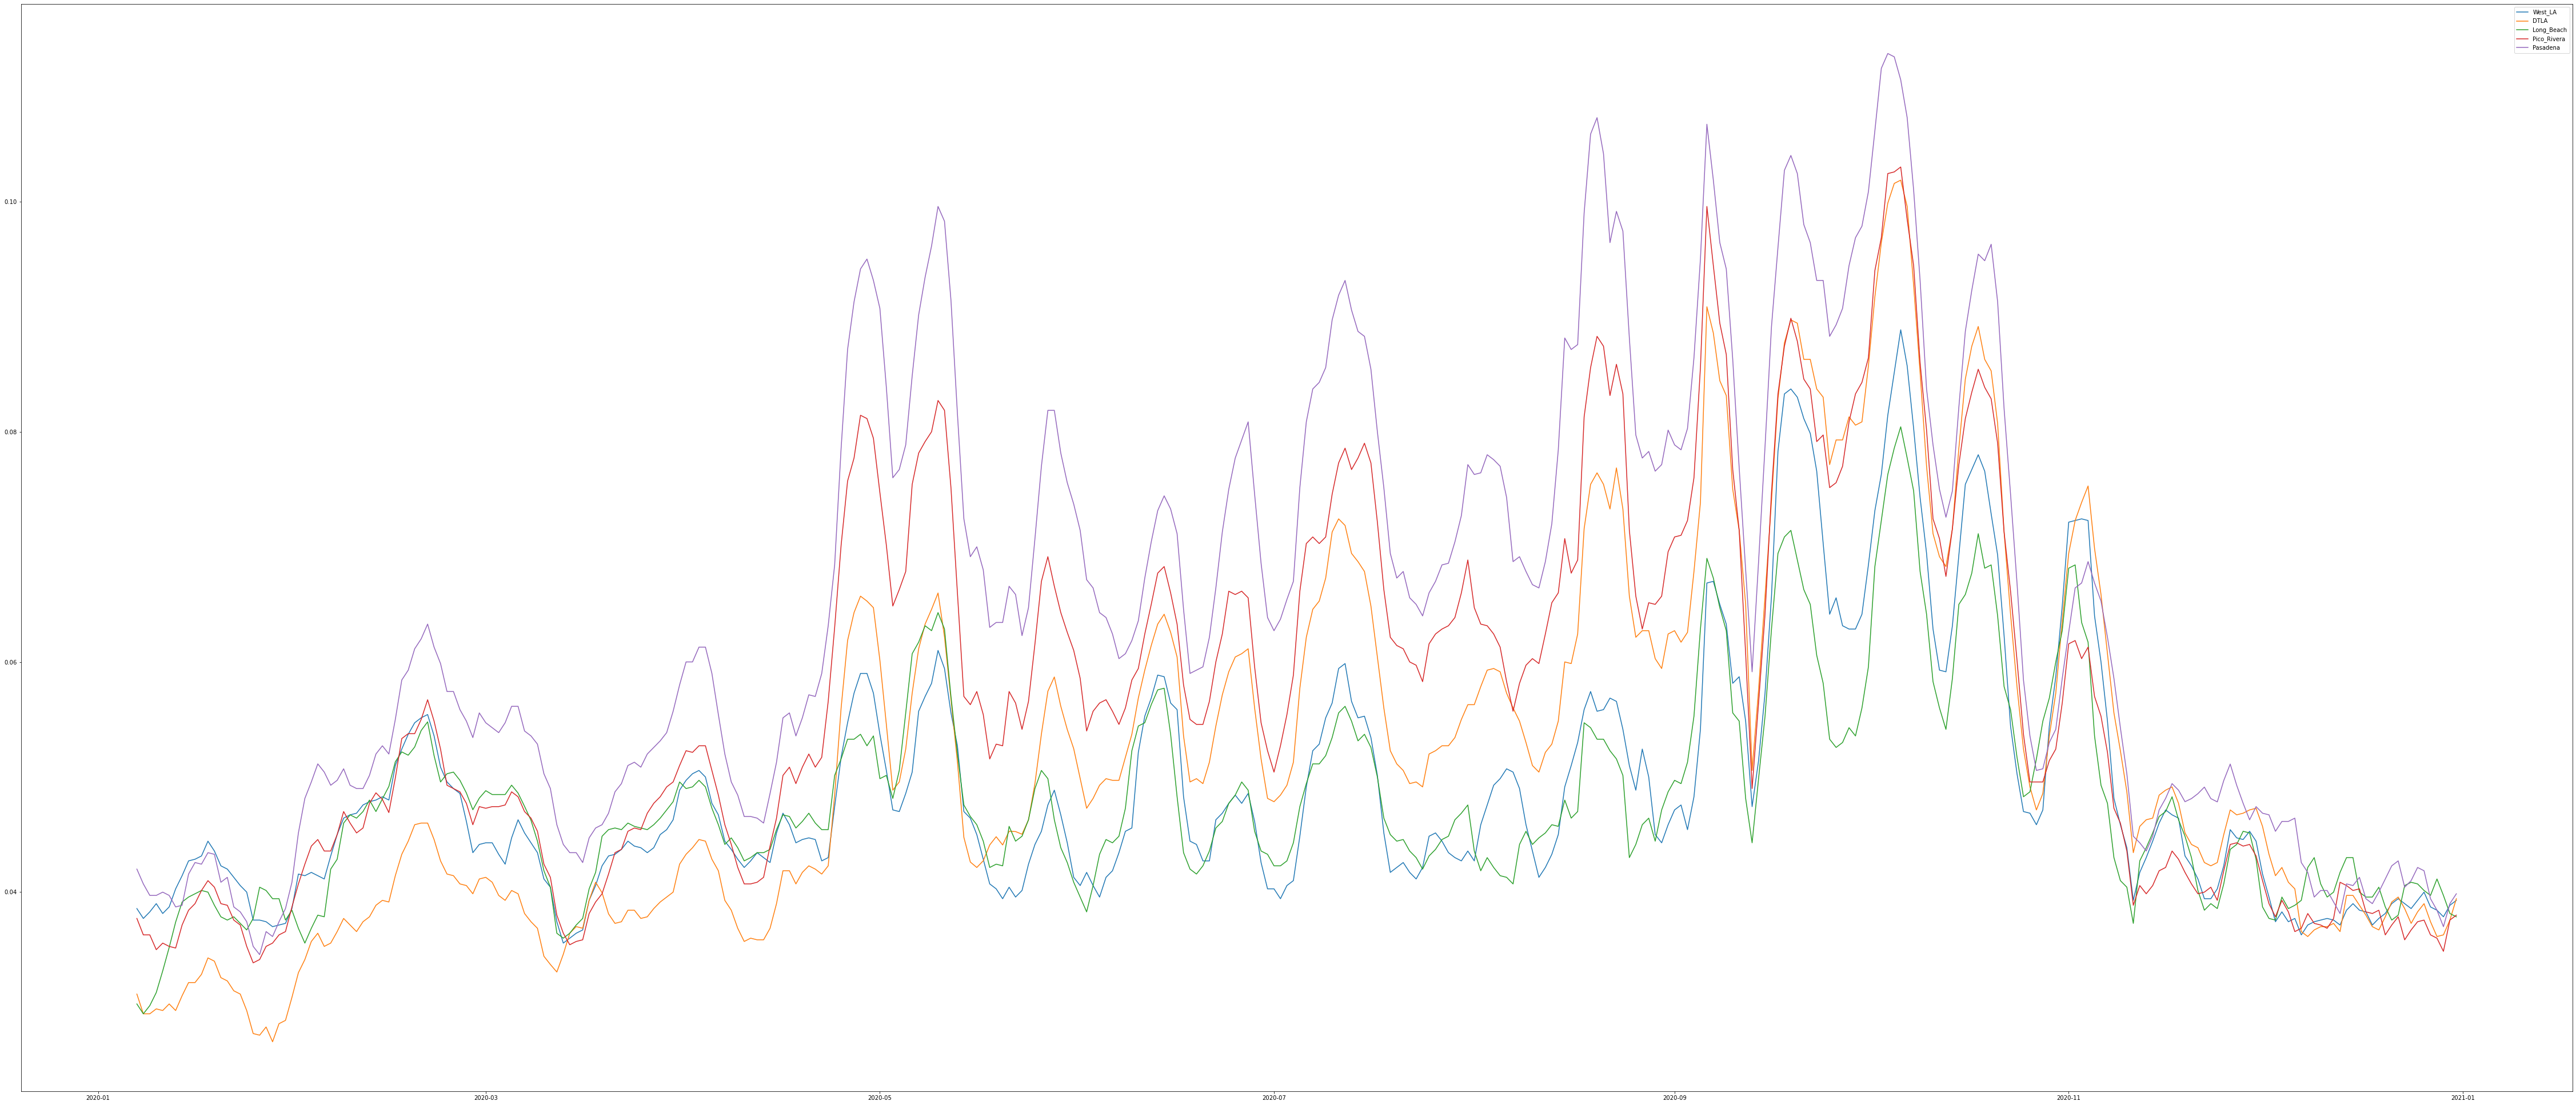

In [130]:
fig = plt.figure(figsize=(80, 35))

for df in dfs:
    plt.plot(df[1]['ozone'].rolling(7).mean(), label=df[0])

plt.legend(loc="best")
plt.show()